In [295]:
pwd

'C:\\Users\\reza\\Desktop\\dsi\\Projects\\project_3'

In [296]:
%autosave 180

Autosaving every 180 seconds


**START**: There is some markets aound where we can look for safe and healthy produces that free of meat.
Using Natural Language Processing I think of a model to develop to identify the people who are trying to use free meat produces. How many posts and comments are online for vegan. Finally the model will optimize Specificity.
I will work on all models I know and I have enough information about those.

In [1]:
import requests
from bs4 import BeautifulSoup

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
import seaborn as sns
import scipy.stats as stats

In [4]:
import time
from datetime import datetime, timedelta

In [212]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [211]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler

In [5]:
from sklearn.feature_extraction import stop_words
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.stem import PorterStemmer, WordNetLemmatizer

C:\Users\reza\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.feature_extraction.stop_words module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_extraction.text. Anything that cannot be imported from sklearn.feature_extraction.text is now part of the private API.
  warnings.warn(message, FutureWarning)


## Apply all information based on Sir Reily YouTube Video.

In [253]:
url = "https://api.pushshift.io/reddit/search/submission"

# submit a base url with a dictionary of parameters;
params = {"subreddit":"Vegeterian",                                       # name of the subreddit
           "size":500,                                                     # default size is 25, max value is 500
          "before": None}                                                 # data before timestamp                     

res = requests.get(url, params)

res.status_code

data = res.json()

posts = data['data']
posts

len(posts)

20

# Collect Data 

## Choose two subreddits: 1. Vegetarian,  2. Vegan

### First Subreddit = Vegetarian

In [254]:
n = 0
last = ''
posts_list = []

url='https://api.pushshift.io/reddit/search/submission/?subreddit=Vegetarian'

while n < 10000:
    request = requests.get('{}&before={}'.format(url, last))
    json = request.json()
    for post in json['data']:
        posts_list.append(post)
        n += 1
last = int(post['created_utc'])
print(request.status_code)    

200


In [255]:
vegi_df = pd.DataFrame(posts_list)

In [256]:
vegi_df[['title']].head(3)

,title
0,I attempted Yeast Free Naan! Paneer Masala and...
1,Question about Vitamin A Palamite
2,Spinach Pesto with Seared Tomatoes and Shaved ...


In [257]:
vegi_df[['title', 'selftext']].head(3)

,title,selftext
0,I attempted Yeast Free Naan! Paneer Masala and...,
1,Question about Vitamin A Palamite,"I've been vegetarian for a bit, and I know to ..."
2,Spinach Pesto with Seared Tomatoes and Shaved ...,


In [258]:
vegi_df[['title', 'selftext', 'subreddit']].head(3)

,title,selftext,subreddit
0,I attempted Yeast Free Naan! Paneer Masala and...,,vegetarian
1,Question about Vitamin A Palamite,"I've been vegetarian for a bit, and I know to ...",vegetarian
2,Spinach Pesto with Seared Tomatoes and Shaved ...,,vegetarian


In [259]:
vegi_df['subreddit'].value_counts()

vegetarian    10000
Name: subreddit, dtype: int64

In [260]:
vegi_df = vegi_df[['title', 'selftext', "subreddit"]]

### Second Subreddit = Vegan

In [262]:
n = 0
last = ''
posts_list = []

url='https://api.pushshift.io/reddit/search/submission/?subreddit=Vegan'

while n < 10000:
    request = requests.get('{}&before={}'.format(url, last))
    json = request.json()
    for post in json['data']:
        posts_list.append(post)
        n += 1
last = int(post['created_utc'])
print(request.status_code)   

200


In [263]:
vegan_df = pd.DataFrame(posts_list)

In [264]:
vegan_df[['title']].head(3)

,title
0,Food Business Name Ideas
1,I discovered the trick to easily getting all o...
2,Yummmyyy


In [265]:
vegan_df[['title', 'selftext']].head(3)

,title,selftext
0,Food Business Name Ideas,I am thinking of putting up a vegan food deliv...
1,I discovered the trick to easily getting all o...,
2,Yummmyyy,


In [266]:
vegan_df[['title', 'selftext']].tail(3)

,title,selftext
9997,PETA isn't the savior you think it is,
9998,It’s not racism or anything like that,[removed]
9999,Could we be more of a plague to this planet?,


In [267]:
vegan_df[['title', 'selftext', 'subreddit']].head(3)

,title,selftext,subreddit
0,Food Business Name Ideas,I am thinking of putting up a vegan food deliv...,vegan
1,I discovered the trick to easily getting all o...,,vegan
2,Yummmyyy,,vegan


In [268]:
vegan_df['subreddit'].value_counts()

vegan    10000
Name: subreddit, dtype: int64

In [269]:
vegan_df = vegan_df[['title', 'selftext', "subreddit"]]

In [270]:
df = pd.concat([vegi_df, vegan_df])

In [271]:
df.head(3)

,title,selftext,subreddit
0,I attempted Yeast Free Naan! Paneer Masala and...,,vegetarian
1,Question about Vitamin A Palamite,"I've been vegetarian for a bit, and I know to ...",vegetarian
2,Spinach Pesto with Seared Tomatoes and Shaved ...,,vegetarian


In [272]:
df.tail(3)

,title,selftext,subreddit
9997,PETA isn't the savior you think it is,,vegan
9998,It’s not racism or anything like that,[removed],vegan
9999,Could we be more of a plague to this planet?,,vegan


## Create a new column named "text" to cover both "title" and "seltext" to fill more cells.

In [285]:
df['text'] = df['title'] + ' ' + df['selftext']

In [286]:
df.head(3)

,title,selftext,subreddit,text
0,I attempted Yeast Free Naan! Paneer Masala and...,,vegetarian,I attempted Yeast Free Naan! Paneer Masala and...
1,Question about Vitamin A Palamite,"I've been vegetarian for a bit, and I know to ...",vegetarian,Question about Vitamin A Palamite I've been ve...
2,Spinach Pesto with Seared Tomatoes and Shaved ...,,vegetarian,Spinach Pesto with Seared Tomatoes and Shaved ...


In [27]:
df.tail(3)

,title,selftext,subreddit,text
9997,Thought y’all might like this card :),,vegan,Thought y’all might like this card :)
9998,I HATE VEGANS,,vegan,I HATE VEGANS
9999,Coming this week at my Aldi only $3.99 for a p...,,vegan,Coming this week at my Aldi only $3.99 for a p...


## With 20,000 observations and two equal calsses our DataFrame are created.

In [28]:
df["subreddit"].value_counts()

vegetarian    10000
vegan         10000
Name: subreddit, dtype: int64

In [29]:
df.shape

(20000, 4)

## Our "subreddit" column with two equal categories should be converted into Boolean (binary labels).

In [30]:
df["subreddit"] = df["subreddit"].map({"vegetarian": 1, "vegan": 0})
df["subreddit"].value_counts()

1    10000
0    10000
Name: subreddit, dtype: int64

In [31]:
df.head()

,title,selftext,subreddit,text
0,Fried spicy sweet potato balls that became cubes,,1,Fried spicy sweet potato balls that became cubes
1,Could our app help keeping your dieting style?,"Hi,\n\nI’m a researcher at an early stage nutr...",1,Could our app help keeping your dieting style?...
2,Craving,Hey I’ve tried going vegetarian at least 5/6 t...,1,Craving Hey I’ve tried going vegetarian at lea...
3,Anything to do to stop meat cravings?,"I have been vegetarian (lacto-ovo, but on and ...",1,Anything to do to stop meat cravings? I have b...
4,"Vegan ahi ""tuna"" bowl [Shin Sen Gumi Hakata Ra...",,1,"Vegan ahi ""tuna"" bowl [Shin Sen Gumi Hakata Ra..."


In [32]:
df.tail()

,title,selftext,subreddit,text
9995,Is OK to swallow after oral?,NaN,0,NaN
9996,Would most vegans ridicule a person who choose...,[removed],0,Would most vegans ridicule a person who choose...
9997,Thought y’all might like this card :),,0,Thought y’all might like this card :)
9998,I HATE VEGANS,,0,I HATE VEGANS
9999,Coming this week at my Aldi only $3.99 for a p...,,0,Coming this week at my Aldi only $3.99 for a p...


## Some statistical information.

In [33]:
# First subreddit Vegetarian,

print('Mean characters in text, Vegetarian subreddit: ' + str(round(df.loc[df['subreddit'] == 1]['text'].str.len().mean(),2)))
print('Median characters in text, Vegetarian subreddit: ' + str(round(df.loc[df['subreddit'] == 1]['text'].str.len().median(),2)))

Mean characters in text, Vegetarian subreddit: 318.42
Median characters in text, Vegetarian subreddit: 253.0


In [34]:
# Second subreddit Vegan,

print('Mean characters in text, Vegan subreddit: ' + str(round(df.loc[df['subreddit'] == 1]['text'].str.len().mean(),2)))
print('Median characters in text, Vegan subreddit: ' + str(round(df.loc[df['subreddit'] == 1]['text'].str.len().median(),2)))

Mean characters in text, Vegan subreddit: 318.42
Median characters in text, Vegan subreddit: 253.0


In [35]:
# Finally Mean + median text length,

print('Mean characters in text: ' + str(round(df['text'].str.len().mean(),2)))
print('Median characters in text: ' + str(round(df['text'].str.len().median(),2)))

Mean characters in text: 299.29
Median characters in text: 117.0


In [36]:
#df[df["title"].isin(["Vegan", , "Vegetarian"])]

## Now we can save our data to csv,  Lesson  2.01 - intro to pandas, 0.13 Exporting Data.

In [38]:
df.to_csv("df.csv")
df = pd.read_csv("df.csv")

In [39]:
df.head()

,Unnamed: 0,title,selftext,subreddit,text
0,0,Fried spicy sweet potato balls that became cubes,NaN,1,Fried spicy sweet potato balls that became cubes
1,1,Could our app help keeping your dieting style?,"Hi,\n\nI’m a researcher at an early stage nutr...",1,Could our app help keeping your dieting style?...
2,2,Craving,Hey I’ve tried going vegetarian at least 5/6 t...,1,Craving Hey I’ve tried going vegetarian at lea...
3,3,Anything to do to stop meat cravings?,"I have been vegetarian (lacto-ovo, but on and ...",1,Anything to do to stop meat cravings? I have b...
4,4,"Vegan ahi ""tuna"" bowl [Shin Sen Gumi Hakata Ra...",NaN,1,"Vegan ahi ""tuna"" bowl [Shin Sen Gumi Hakata Ra..."


In [40]:
df.shape

(20000, 5)

In [41]:
df.drop(columns = ['Unnamed: 0'], inplace = True)

In [42]:
df.head(3)

,title,selftext,subreddit,text
0,Fried spicy sweet potato balls that became cubes,NaN,1,Fried spicy sweet potato balls that became cubes
1,Could our app help keeping your dieting style?,"Hi,\n\nI’m a researcher at an early stage nutr...",1,Could our app help keeping your dieting style?...
2,Craving,Hey I’ve tried going vegetarian at least 5/6 t...,1,Craving Hey I’ve tried going vegetarian at lea...


In [43]:
df.isnull().sum()

title            0
selftext     10000
subreddit        0
text           800
dtype: int64

In [44]:
df.isnull().mean()

title        0.00
selftext     0.50
subreddit    0.00
text         0.04
dtype: float64

## We succesfully did collectig data for both of our subreddits and now we are ready to clean our data along doind EDA then move for NLP.

In [45]:
df["subreddit"].value_counts(normalize = True)

1    0.5
0    0.5
Name: subreddit, dtype: float64

## Some work on 'Null' values,

In [46]:
df["selftext"].fillna('', inplace = True)

In [63]:
df["text"].fillna('', inplace = True)

In [64]:
df.isnull().sum()

title        0
selftext     0
subreddit    0
text         0
dtype: int64

In [48]:
#df.drop_duplicates(inplace = True)

In [65]:
df.head()

,title,selftext,subreddit,text
0,Fried spicy sweet potato balls that became cubes,,1,Fried spicy sweet potato balls that became cubes
1,Could our app help keeping your dieting style?,"Hi,\n\nI’m a researcher at an early stage nutr...",1,Could our app help keeping your dieting style?...
2,Craving,Hey I’ve tried going vegetarian at least 5/6 t...,1,Craving Hey I’ve tried going vegetarian at lea...
3,Anything to do to stop meat cravings?,"I have been vegetarian (lacto-ovo, but on and ...",1,Anything to do to stop meat cravings? I have b...
4,"Vegan ahi ""tuna"" bowl [Shin Sen Gumi Hakata Ra...",,1,"Vegan ahi ""tuna"" bowl [Shin Sen Gumi Hakata Ra..."


In [66]:
df.tail()

,title,selftext,subreddit,text
19995,Is OK to swallow after oral?,,0,
19996,Would most vegans ridicule a person who choose...,[removed],0,Would most vegans ridicule a person who choose...
19997,Thought y’all might like this card :),,0,Thought y’all might like this card :)
19998,I HATE VEGANS,,0,I HATE VEGANS
19999,Coming this week at my Aldi only $3.99 for a p...,,0,Coming this week at my Aldi only $3.99 for a p...


In [67]:
df.shape

(20000, 4)

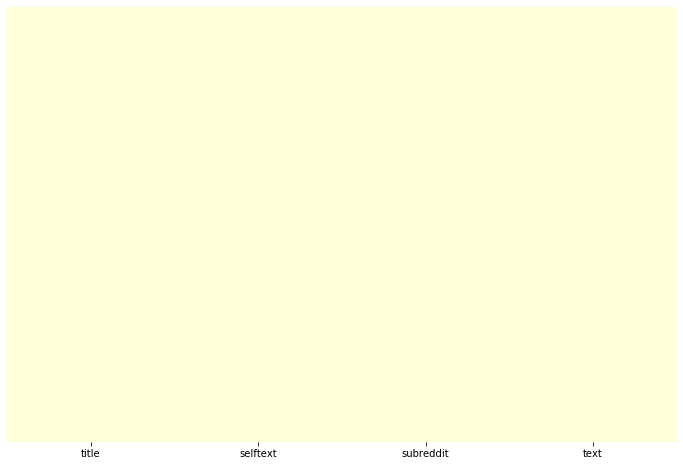

In [68]:
# to see there is no "null" values in our data;

plt.figure(figsize = (12, 8))

import seaborn as sns

sns.heatmap(df.isnull(), yticklabels = False, cbar = False, cmap = "YlGnBu")

In [69]:
df.dtypes

title        object
selftext     object
subreddit     int64
text         object
dtype: object

In [70]:
# Set up our X and y variables;

features = "text"
target = "subreddit"

X = df[features]
y = df[target]

In [71]:
X.head()

0    Fried spicy sweet potato balls that became cubes 
1    Could our app help keeping your dieting style?...
2    Craving Hey I’ve tried going vegetarian at lea...
3    Anything to do to stop meat cravings? I have b...
4    Vegan ahi "tuna" bowl [Shin Sen Gumi Hakata Ra...
Name: text, dtype: object

In [72]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: subreddit, dtype: int64

In [73]:
y.tail()

19995    0
19996    0
19997    0
19998    0
19999    0
Name: subreddit, dtype: int64

In [74]:
y.value_counts()

1    10000
0    10000
Name: subreddit, dtype: int64

## To find some top words for both subreddits.

In [289]:
# google, kdnuggles.com

def get_top_n_words(corpus, n = None):
    covec = CountVectorizer(stop_words = 'english').fit(corpus)
    bag_of_words = covec.transform(corpus)
    sum_words = bag_of_words.sum(axis = 0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in covec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
    return words_freq[:n]

In [291]:
# Top 10 vegeterian words (no stop words);

top_vegi = get_top_n_words(df[df['subreddit'] == 1]['text'], 10)
top_vegi = dict(top_vegi)
top_vegi

In [292]:
# Top 10 vegan words (no stop words);

top_vegan = get_top_n_words(df[df['subreddit'] == 0]['text'], 10)
top_vegan = dict(top_vegan)
top_vegan

## A bar graph of top words

In [293]:
# barplot of top 10 vegetarian tokens; 

# set the fig size;

plt.figure(figsize = (14, 11))

sns.barplot(x = list(top_vegi.keys()),y = list(top_vegi.values()))
plt.title('Frequency of Top 10 Tokens in vegetarian_reddit', fontsize = 15)
plt.xlabel('Tokens', fontsize = 12)
plt.ylabel('Token Count',fontsize = 12);

In [294]:
# barplot of top 10 vegan tokens;

# set the fig size;

plt.figure(figsize = (14, 11))

sns.barplot(x = list(top_vegan.keys()), y = list(top_vegan.values()))
plt.title('Frequency of Top 10 Tokens in vegan_reddit', fontsize = 15)
plt.xlabel('Tokens',fontsize = 12)
plt.ylabel('Token Count',fontsize = 12);

## Split the Data

In [75]:
from sklearn.model_selection import train_test_split

In [243]:
# Split the data into the training and testing sets.

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    stratify = y,
                                                    test_size = 0.3,
                                                    random_state = 42)

# Model = CountVectorizer

In [92]:
# Instantiate a CountVectorizer.

covec = CountVectorizer()

In [93]:
# Fit the vectorizer on our corpus.

covec.fit(X_train)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [94]:
# Transform the corpus.

X_train = covec.transform(X_train)

In [95]:
# Convert X_train into a DataFrame.

X_train_df = pd.DataFrame(X_train.toarray(),
                          columns=covec.get_feature_names())
X_train_df.head()

,10,15,19,99,about,absolutely,abundance,abuse,accidentally,acres,...,wraps,wrong,wrote,www,year,years,yet,yogurt,you,your
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [96]:
# Transform the corpus.

X_test = covec.transform(X_test)

In [97]:
# Transform test

X_test_df = pd.DataFrame(X_test.toarray(),
                         columns=covec.get_feature_names())

X_test_df.head()

,10,15,19,99,about,absolutely,abundance,abuse,accidentally,acres,...,wraps,wrong,wrote,www,year,years,yet,yogurt,you,your
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,2,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,5,1


In [98]:
# Let's look at sklearn's stopwords.

print(CountVectorizer(stop_words = 'english').get_stop_words())

frozenset({'get', 'being', 'for', 'together', 'wherever', 'must', 'me', 'off', 'we', 'in', 'yourselves', 'with', 'also', 'per', 'beyond', 'either', 'so', 'never', 'am', 'whereas', 'on', 'have', 'front', 'inc', 'it', 'been', 'beforehand', 'she', 'take', 'whereafter', 'beside', 'what', 'but', 'everything', 'would', 'are', 'both', 'fill', 'nobody', 'etc', 'hundred', 'back', 'will', 'your', 'four', 'name', 'amongst', 'former', 'found', 'becomes', 'enough', 'somewhere', 'fifty', 'his', 'same', 'until', 'eleven', 'seem', 'next', 'own', 'move', 'thus', 'hence', 'fire', 'afterwards', 'and', 'less', 'done', 'others', 'least', 'such', 'below', 'show', 'again', 'amount', 'side', 'someone', 'though', 'her', 'mostly', 'any', 'whoever', 'part', 'another', 'hereby', 'wherein', 'describe', 'several', 'or', 'onto', 'noone', 'sincere', 'some', 'since', 'there', 'anyhow', 'our', 'call', 're', 'whom', 'many', 'two', 'therefore', 'already', 'mine', 'their', 'thereafter', 'made', 'three', 'they', 'no', 'giv

In [99]:
# Redefine training and testing sets.

# X_train, X_test, y_train, y_test = train_test_split(X,
#                                                     y,
#                                                     test_size=0.33,
#                                                     stratify=y,
#                                                     random_state=42)

In [193]:
y_test.value_counts(normalize=True)

1    0.5
0    0.5
Name: subreddit, dtype: float64

In [195]:
# Let's set a pipeline up with two stages:
# 1. CountVectorizer (transformer)
# 2. LogisticRegression (estimator)

pipe = Pipeline([
    ('covec', CountVectorizer()),
    ('logreg', LogisticRegression(solver = 'lbfgs'))
])

In [196]:
# From the lesson;

# Search over the following values of hyperparameters:
# Maximum number of features fit: 2000, 3000, 4000, 5000
# Minimum number of documents needed to include token: 2, 3
# Maximum number of documents needed to include token: 90%, 95%
# Check (individual tokens) and also check (individual tokens and 2-grams).

pipe_params = {
    'covec__max_features': [2_000, 3_000, 4_000, 5_000],
    'covec__min_df': [2, 3],
    'covec__max_df': [.9, .95],
    'covec__ngram_range': [(1,1), (1,2)]
}

In [197]:
# Instantiate GridSearchCV.

gs = GridSearchCV(pipe,                              # what object are we optimizing?
                  param_grid = pipe_params,          # what parameters values are we searching?
                  cv = 5)                            # 5-fold cross-validation.

In [198]:
# Fit GridSearch to training data.

gs.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('covec',
                                        CountVectorizer(analyzer='word',
                                                        binary=False,
                                                        decode_error='strict',
                                                        dtype=<class 'numpy.int64'>,
                                                        encoding='utf-8',
                                                        input='content',
                                                        lowercase=True,
                                                        max_df=1.0,
                                                        max_features=None,
                                                        min_df=1,
                                                        ngram_range=(1, 1),
                                                        pre

In [199]:
# What's the best score?

print(gs.best_score_)

0.9802142857142856


In [200]:
# Save best model as gs_model.

gs_covec = gs.best_estimator_

In [201]:
# Score model on training set.

gs_covec.score(X_train, y_train)

0.9802142857142857

In [202]:
# Score model on testing set.

gs_covec.score(X_test, y_test)

0.9795

In [203]:
cross_val_score(pipe, X_train, y_train, cv = 3).mean()

0.9802141987714856

### Compare the performance of our models.

In [208]:
logreg_bl = gs.best_estimator_
logreg_bl.fit(X_train, y_train)

logreg_bl.score(X_train, y_train)

0.9802142857142857

In [209]:
logreg_bl.score(X_test, y_test)

0.9795

In [210]:
y_train.value_counts(normalize = True)

1    0.5
0    0.5
Name: subreddit, dtype: float64

# Model = TfidfVectorize

In [139]:
# Instantiate the transformer.

tf_vec = TfidfVectorizer()

In [140]:
df = pd.DataFrame(tf_vec.fit_transform(X_train).toarray(), columns = tf_vec.get_feature_names())
                  
df.head()

,10,15,19,99,about,absolutely,abundance,abuse,accidentally,acres,...,wraps,wrong,wrote,www,year,years,yet,yogurt,you,your
0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
1,0.474471,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.151131,0.0,0.0,0.0,0.0
2,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
3,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
4,0.000000,0.0,0.0,0.0,0.0,0.197909,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0


In [141]:
X_train = tf_vec.fit_transform(X_train)

X_test = tf_vec.transform(X_test)

In [142]:
# Instantiate logistic regression.

logreg = LogisticRegression(solver = 'lbfgs')

# Fit logistic regression.

logreg.fit(X_train, y_train)

# Evaluate logistic regression.

print(f'Training Score: {logreg.score(X_train, y_train)}')
print(f'Testing Score: {logreg.score(X_test, y_test)}')

Training Score: 0.9802142857142857
Testing Score: 0.9795


In [123]:
# Define a function to calculate and show classification metrics,

from sklearn.metrics import confusion_matrix


def class_metrics(model, X, y): 
    
    # Generate predictions
    
    preds = model.predict(X)
    
    # Get confusion matrix and unravel
    
    tn, fp, fn, tp = confusion_matrix(y,preds).ravel()
    
    # Accuracy
    
    print(f'Accuracy: {round((tp + tn)/len(y),3)}')
    
    # Sensitivity or Recall
    
    print(f'Sensitivity: {round(tp /(tp + fn),3)}')
    
    # Specificity
    
    print(f'Specificity: {round(tn / (tn + fp),3)}')
    
    # Precision
    
    print(f'Precision: {round(tp / (tp + fp),3)}')

# Logistic Regression and CountVectorizer Transformation

In [118]:
# Set up pipleline, "c" represents CounterVectorizer;

c_pipe = Pipeline([
    ('covec', CountVectorizer()),
    ('logreg', LogisticRegression(solver = 'liblinear'))
])

In [119]:
# Pipe parameters, "c" represents CounterVectorizer;

c_pipe_params = {
    'covec__max_features': [100, 500],
    'covec__stop_words': [None, 'english'],
    'covec__ngram_range': [(1,1), (1,2)],
    'logreg__C': [0.1, 1, 1e9],
    'logreg__penalty': ['l1', 'l2']
}

In [125]:
# Instantiate GridSearchCV, "c" represents CounterVectorizer; 

c_gs = GridSearchCV(c_pipe, c_pipe_params, cv = 5, n_jobs = 2)

# Fit;

c_gs.fit(X_train,y_train);

# Show metrics and best parameters;

print(c_gs.best_params_)
class_metrics(c_gs,X_test,y_test)

{'cvec__max_features': 500, 'cvec__ngram_range': (1, 1), 'cvec__stop_words': None, 'logreg__C': 0.1, 'logreg__penalty': 'l1'}
Accuracy: 0.98
Sensitivity: 0.959
Specificity: 1.0
Precision: 1.0


In [126]:
class_metrics(c_gs,X_train,y_train)

Accuracy: 0.98
Sensitivity: 0.96
Specificity: 1.0
Precision: 1.0


# Logistic Regression and TfidfVectorizer Transformation

In [127]:
# Set up pipleline;

lr_tf_pipe = Pipeline([
    ('tfidf',TfidfVectorizer()),
    ('logreg',LogisticRegression(solver = 'liblinear'))
])

In [128]:
# Pipe parameters;

lr_tf_pipe_params = {
    'tfidf__max_features': [100, 500],
    'tfidf__stop_words': [None,'english'],
    'tfidf__ngram_range': [(1,1), (1,2)],
    'logreg__C': [0.1, 1, 1e9]
}

In [129]:
# tfidf grid search
# Instantiate GridSearchCV.

lr_tf_gs = GridSearchCV(lr_tf_pipe, 
                    lr_tf_pipe_params, 
                    cv = 5,
                    n_jobs = 2) 

In [131]:
# Fit grid search;

lr_tf_gs.fit(X_train,y_train);


# Show metrics and best parameters;

print(lr_tf_gs.best_params_)
class_metrics(lr_tf_gs,X_test,y_test)

{'logreg__C': 0.1, 'tfidf__max_features': 500, 'tfidf__ngram_range': (1, 1), 'tfidf__stop_words': None}
Accuracy: 0.98
Sensitivity: 0.959
Specificity: 1.0
Precision: 1.0


In [132]:
class_metrics(lr_tf_gs,X_train,y_train)

Accuracy: 0.98
Sensitivity: 0.96
Specificity: 1.0
Precision: 1.0


# CountVectorizer and the Multinomial Naive Bayes estimator

**NOTE**: Remember lab information that why we use Multinomial Naive Bayes, because our nonnegative integers values. CounterVectorizer transforms our data.

In [133]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

In [134]:
pipe_cv = Pipeline([
    ('vec',CountVectorizer()),
    ('estimator', MultinomialNB())
])

In [135]:
pipe_params = {
    'vec__max_features':[1000, 2000, 5000],
    'vec__min_df':[2, 3],
    'vec__max_df':[0.90, 0.95, 1.0],
    'vec__ngram_range': [(1,1), (1,2), (1,3)]
}

**NOTE**: We need to apply GridSearchCV to find the best parameters, because we need to tune our CountVectorizer.

In [137]:
from sklearn.model_selection import GridSearchCV

t_0 = time.time()

gs_cv = GridSearchCV(pipe_cv,
                     pipe_params,
                     cv = 5,
                     n_jobs = -1                     
                 )
gs_cv.fit(X_train, y_train)

print(time.time() - t_0)

674.4819326400757


In [146]:
# From the lesson;

# Import Tokenizer

from nltk.tokenize import RegexpTokenizer

# Instantiate Tokenizer

tokenizer = RegexpTokenizer(r'\w+')

# "Run" Tokenizer

spam_tokens = tokenizer.tokenize(spam.lower())

# Import stemmer.

from nltk.stem.porter import PorterStemmer

# Instantiate object of class PorterStemmer.

p_stemmer = PorterStemmer()

# Stem tokens.

stem_spam = [p_stemmer.stem(i) for i in spam_tokens]

In [150]:
# PorterStemmer - CoVec

p_stemmer = PorterStemmer()
covec_analyzer = CountVectorizer().build_analyzer()

def porter_covec_words(doc):
    return (p_stemmer.stem(word) for word in covec_analyzer(doc))

In [151]:
# WordNetLemmatizer - CoVec

lemmatizer = WordNetLemmatizer()

def lemmatizer_covec_words(doc):
    return (lemmatizer.lemmatize(word) for word in covec_analyzer(doc))

# Logistic Regression - CountVectorizer Transformation AND ANALYZER

In [156]:
# Set up pipleline
pipe_ct = Pipeline([
    ('covec',CountVectorizer()),
    ('logreg',LogisticRegression(solver = 'liblinear'))
])

In [157]:
# Pipe parameters
pipe_ct_params = {
    'covec__max_features': [100, 500],
    'covec__stop_words': [None,'english'],
    'covec__ngram_range': [(1,1), (1,2)],
    'covec__analyzer': ['word', porter_covec_words, lemmatizer_covec_words],
    'logreg__C': [0.1, 1, 1e9],
    'logreg__penalty': ['l1','l2']
}

In [158]:
# Instantiate GridSearchCV;

gs_ct = GridSearchCV(pipe_ct, pipe_ct_params, cv = 5, n_jobs = 2)

# Fit;

gs_ct.fit(X_train, y_train);

# Show metrics and best parameters;

print(gs_ct.best_params_)
class_metrics(gs_ct, X_test, y_test)

{'covec__analyzer': 'word', 'covec__max_features': 500, 'covec__ngram_range': (1, 1), 'covec__stop_words': None, 'logreg__C': 0.1, 'logreg__penalty': 'l1'}
Accuracy: 0.98
Sensitivity: 0.959
Specificity: 1.0
Precision: 1.0


In [159]:
class_metrics(gs_ct, X_train, y_train)

Accuracy: 0.98
Sensitivity: 0.96
Specificity: 1.0
Precision: 1.0


**NOTE**: It seems we get  great result. Accuracy is really high. Classification metrics are good at score. Specifity and sensitivity scores are so close and the gap is not much.

# Logistic Regression - TfidfVectorizer Transformation AND ANALYZER

In [219]:
# PorterStemmer - TfIdf;

tf_idf_analyzer = TfidfVectorizer().build_analyzer()

def porter_tfidf_words(doc):
    return (p_stemmer.stem(word) for word in tf_idf_analyzer(doc))

In [220]:
# WordNetLemmatizer - TfIdf;

def lemmatizer_tfidf_words(doc):
    return (lemmatizer.lemmatize(word) for word in tf_idf_analyzer(doc))

In [221]:
# Set up pipleline;

pipe_tfc = Pipeline([
    ('tf_idf',TfidfVectorizer(analyzer = porter_tfidf_words)),
    ('logreg',LogisticRegression(solver = 'liblinear'))
])

In [222]:
# Pipe parameters;

pipe_tfc_params = {
    'tf_idf__max_features': [100, 500],
    'tf_idf__stop_words': [None,'english'],
    'tf_idf__ngram_range': [(1,1), (1,2)],
    'logreg__C': [0.1, 1, 1e9]
}

In [224]:
# tf_idf grid search
# Instantiate GridSearchCV.

gs_tfc = GridSearchCV(pipe_tfc, pipe_tfc_params,  cv = 5,  n_jobs = 2) 

# Fit grid search;

gs_tfc.fit(X_train, y_train);


# Show metrics and best parameters;

print(gs_tfc.best_params_)
class_metrics(gs_tfc, X_test, y_test)

{'logreg__C': 0.1, 'tf_idf__max_features': 500, 'tf_idf__ngram_range': (1, 1), 'tf_idf__stop_words': None}
Accuracy: 0.98
Sensitivity: 0.959
Specificity: 1.0
Precision: 1.0


In [225]:
class_metrics(gs_tfc, X_train, y_train)

Accuracy: 0.98
Sensitivity: 0.96
Specificity: 1.0
Precision: 1.0


In [169]:
cross_val_score(pipe_tfc, X_train, y_train, cv = 3).mean()

0.9802141987714856

# Transformation X to work on $k$-NN

In [172]:
# CountVectorizer model,    # Instantiate THE model;
# represent by    "Z";

covec = CountVectorizer(analyzer = porter_covec_words, max_features = 500)

# Fit the model;

covec.fit(X_train)

# Transform;

Z_train = covec.transform(X_train)
Z_test = covec.transform(X_test)

In [173]:
# Convert to dataframe;   represent by "Z";

Z_train = pd.DataFrame(Z_train.toarray(), columns = covec.get_feature_names())
Z_test = pd.DataFrame(Z_test.toarray(), columns = covec.get_feature_names())

In [175]:
# TfidfVectorizer model,   # Instantiate the model;   represent by "T";

tf_idf_t = TfidfVectorizer(analyzer = porter_covec_words, max_features = 500)

# Fit the model;

tf_idf_t.fit(X_train)

# Transform;

T_train = tf_idf_t.transform(X_train)
T_test = tf_idf_t.transform(X_test)

In [176]:
# Convert to dataframe;     represent by "T";

T_train = pd.DataFrame(T_train.toarray(), columns = tf_idf_t.get_feature_names())
T_test = pd.DataFrame(T_test.toarray(), columns = tf_idf_t.get_feature_names())

#  Model: $K$NN -  Transformation: CountVectorizer

In [178]:
# Pipe parameters;

knn_ct_params = {
    'n_neighbors': [1, 3, 5]
}

# Instantiate GridSearchCV;

knn_ct_gs = GridSearchCV(KNeighborsClassifier(),  knn_ct_params, cv = 5, n_jobs = 2)                   

In [179]:
# Scale Data;

st_sc = StandardScaler()
Z_train_sc = st_sc.fit_transform(Z_train)
Z_test_sc = st_sc.transform(Z_test)

In [181]:
# Fit;

knn_ct_gs.fit(Z_train_sc, y_train);

In [182]:
# Show metrics and best parameters; 

print(f'Best hyperparameter: {knn_ct_gs.best_params_}\n')
print('Training Scores')
class_metrics(knn_ct_gs, Z_train_sc, y_train)

print('\nTest Scores')
class_metrics(knn_ct_gs, Z_test_sc, y_test)

Best hyperparameter: {'n_neighbors': 1}

Training Scores
Accuracy: 0.98
Sensitivity: 1.0
Specificity: 0.96
Precision: 0.962

Test Scores
Accuracy: 0.98
Sensitivity: 1.0
Specificity: 0.959
Precision: 0.961


**NOTE**: The result of $k$-nn model is also good. Sensitivity score is a little more than specificity score and it is a success to calassify vegetarian.

#  Model: $K$NN -  Transformation: TfidfVectorizer

In [184]:
# GridSearch parameters;

knn_tf_idft_params = {
    'n_neighbors': [5,15,25]
}

# Instantiate GridSearchCV;

knn_tf_idft_gs = GridSearchCV(KNeighborsClassifier(), knn_tf_idft_params, cv = 5, n_jobs = 2) 

# Fit;

knn_tf_idft_gs.fit(T_train, y_train);

# Show metrics and best parameters;

print(f'Best hyperparameter: {knn_tf_idft_gs.best_params_}\n')

print('Training Scores')
class_metrics(knn_tf_idft_gs, T_train, y_train)

print('\nTest Scores')
class_metrics(knn_tf_idft_gs, T_test, y_test)

Best hyperparameter: {'n_neighbors': 25}

Training Scores
Accuracy: 0.98
Sensitivity: 0.96
Specificity: 1.0
Precision: 1.0

Test Scores
Accuracy: 0.98
Sensitivity: 0.959
Specificity: 1.0
Precision: 1.0


In [233]:
pipe_knn = Pipeline([("covec", CountVectorizer),
                    ("st_sc", st_sc),
                    ("knn", KNeighborsClassifier),
                    ])

In [234]:
pipe_knn_params = {
    'covec__max_features': [3_000, 5_000, 7_500],
    'covec__min_df': [2, 5, 10],
    'knn_n_neighbors': [1, 3, 5],
    'covec__ngram_range': [(1,1), (1,2)]
}

In [235]:
gs_knn = GridSearchCV(pipe_knn,                  # what object are we optimizing?
                  param_grid = pipe_knn_params,        # what parameters values are we searching?
                  cv = 5,                              # 5-fold cross-validation.
                  verbose = 10)                  

In [300]:
pipe_knn.fit(X_train, y_train)

In [301]:
print(f"CV score mean:{cross_val_score(pipe_knn, X_train, y_train, cv = 5).mean()}")

CV score mean:nan


C:\Users\reza\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
AttributeError: 'Series' object has no attribute '_validate_params'

  FitFailedWarning)


# Model: Naive Bayes , Multinomial Naive Bayes Model - CountVectorizer

**Note**: Multinomial Naive Bayes is appropriate when our features are variables that take on only positive integer counts which means CountVectorizer gives us an integer count of words in a document.

In [186]:
# Instantiate the model;

multi_nb = MultinomialNB()

# Fit;

multi_nb.fit(Z_train, y_train)

# Metrics;

print('Training Scores')
class_metrics(multi_nb, Z_train, y_train)

print('\nTest Scores')
class_metrics(multi_nb, Z_test, y_test)

Training Scores
Accuracy: 0.919
Sensitivity: 0.918
Specificity: 0.919
Precision: 0.919

Test Scores
Accuracy: 0.923
Sensitivity: 0.924
Specificity: 0.922
Precision: 0.922


In [190]:
multi_nb.score(Z_train, y_train)

0.9187142857142857

In [191]:
multi_nb.score(Z_test, y_test)

0.923

**NOTE**: I think in this model it seems there is no overfitting and all score are acceptable. The difference between Sensitivity and Specificity score is 0.2 % which means it is about 0.002 better at classifying the vegeterian subreddit.

# Model: Naive Bayes , Gaussian Naive Bayes Model - TfidfVectorizer

**Note**:  It is appropriate when our features are Normally distributed variables. (Realistically, though, we kind of use Gaussian whenever neither Bernoulli nor Multinomial works.) It is not binary form and we can not use Bernoulli Naive Bayes because Bernoulli Naive Bayes is appropriate when our features are all 0/1 variables. We can not use Multinomial Naive Bayes because
Multinomial Naive Bayes is appropriate when our features are variables that take on only positive integer counts. Then we fit Gaussian Naive Bayes.

In [187]:
# Instantiate the model;

gauss_nb = GaussianNB()

# Fit the model;

gauss_nb.fit(Z_train, y_train)

# Metrics;

print('Training Scores')
class_metrics(gauss_nb, T_train, y_train)

print('\nTest Scores')
class_metrics(gauss_nb, T_test, y_test)

Training Scores
Accuracy: 0.962
Sensitivity: 0.924
Specificity: 1.0
Precision: 1.0

Test Scores
Accuracy: 0.956
Sensitivity: 0.912
Specificity: 1.0
Precision: 1.0


In [188]:
gauss_nb.score(T_train, y_train)

0.9617857142857142

In [189]:
gauss_nb.score(T_test, y_test)

0.9558333333333333

**NOTE**:In this model I think NOT missing any vegan posts and classifying at vegetarian is good. 

# Model: Random Forest - CountVectorizer

In [247]:
rand_ft = RandomForestClassifier(random_state = 42)
rand_ft_params = {
    'n_estimators': [100, 125],
    'max_depth': [None, 10, 25, 50],
    'max_features': [None, 'auto']                  
}

In [251]:
rand_ft_gs = GridSearchCV(rand_ft, rand_ft_params, cv = 5, n_jobs = 2)
            
rand_ft_gs.fit(X_train, y_train)

In [252]:
# Show metrics and best parameters;

print(f'Best hyperparameter: {rand_ft_gs.best_params_}\n')

print('Training Scores')
class_metrics(rand_ft_gs, Z_train, y_train)

print('\nTest Scores')
class_metrics(rand_ft_gs, Z_test, y_test)

**Conclusion**: I worked on different models where I can move on them with other conditions. it is possible to get a lot of great scores to get a good result. I prefer to say all models gave good result and scores were acceptabe.
I need more time to work enough to create a model then I am looking for a model that performs a high accuracy and an optimization for our sensitivity.

**NOTE**:
Sensitivity measures how often a test correctly generates a positive result for people who have the condition that’s being tested for (also known as the “true positive” rate).
Specificity measures a test’s ability to correctly generate a negative result for people who don’t have the condition that’s being tested for (also known as the “true negative” rate).